In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

INFO:dataset:Found director field at ../../data/activity_assay/z0.02.hdf5 with 600 frames at {'z': 0.02}


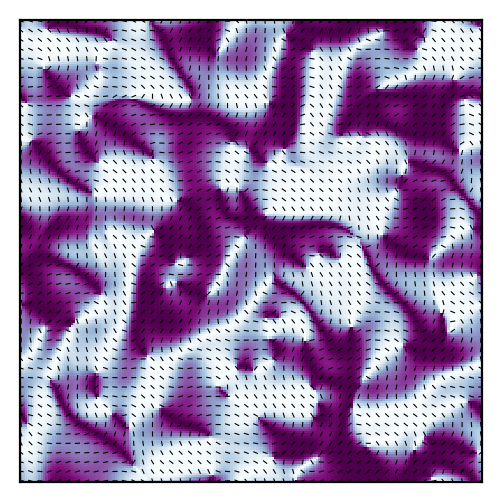

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from dataset import NematicsFrameDataset

def plot_axis(ax, sincos, skip=4):
    twoT = np.arctan2(sincos[0], sincos[1])
    theta = twoT / 2
    theta[theta < 0] += np.pi
    theta[theta > np.pi] -= np.pi

    x, y = np.meshgrid(
        np.linspace(0, 1, sincos.shape[-1]),
        np.linspace(0, 1, sincos.shape[-1]))
    ax.pcolormesh(x, y, sincos[0], cmap='BuPu')
    
    x, y = np.meshgrid(
        np.linspace(0, 1, sincos.shape[-1]//skip),
        np.linspace(0, 1, sincos.shape[-1]//skip))
    slc = np.s_[::skip, ::skip]
    ax.quiver(x, y, np.cos(theta)[slc], np.sin(theta)[slc], pivot='middle',
              headwidth=0, headlength=0, headaxislength=0)
    ax.set(xticks=[], yticks=[])
    ax.set_aspect('equal')

fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200)
dataset = NematicsFrameDataset(
    '../../data/activity_assay/z0.02.hdf5',
)
director, attrs = dataset[0]
sincos = np.stack([
    2*director[0]*director[1],
    director[0]**2-director[1]**2
])

plot_axis(ax, sincos)

INFO:dataset:Found director field at ../../data/activity_assay/z0.02.hdf5 with 596 entries at {'z': 0.02}


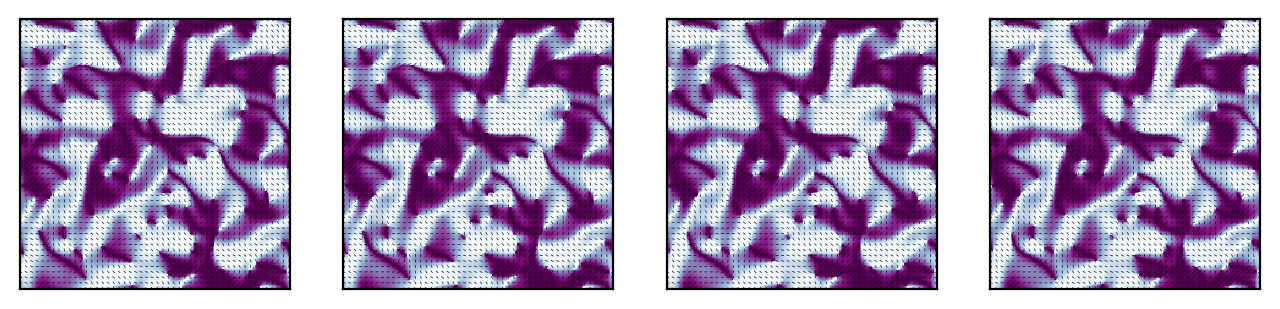

In [9]:
from dataset import NematicsSequenceDataset

fig, ax = plt.subplots(1, 4, figsize=(8, 2), dpi=200)
dataset = NematicsSequenceDataset(
    '../../data/activity_assay/z0.02.hdf5',
    frames_per_seq=4
)
director, attrs = dataset[0]

for i in range(4):
    sincos = np.stack([
        2*director[i,0]*director[i,1],
        director[i,0]**2-director[i,1]**2
    ])
    
    plot_axis(ax[i], sincos)

In [14]:
import glob
from random import shuffle
a = glob.glob('../../data/activity_assay/*.hdf5')
shuffle(a)
print(a)

['../../data/activity_assay/z0.015.hdf5', '../../data/activity_assay/z0.035.hdf5', '../../data/activity_assay/z0.04.hdf5', '../../data/activity_assay/z0.05.hdf5', '../../data/activity_assay/z0.001.hdf5', '../../data/activity_assay/z0.01.hdf5', '../../data/activity_assay/z0.hdf5', '../../data/activity_assay/z0.02.hdf5', '../../data/activity_assay/z0.03.hdf5', '../../data/activity_assay/z0.005.hdf5', '../../data/activity_assay/z0.025.hdf5', '../../data/activity_assay/z0.002.hdf5']
